In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define the corpus
corpus = [
    # Sports documents
    "the sport channel is on turn to soccer channel now",
    "famous soccer player scored many goals on sport channel",
    "channel soccer brings you the latest sport news",
    "soccer season starts with major events lined up",
    "tennis grand slam tournament attracts fans worldwide",
    "the best moments in basketball this season",
    "famous athletes endorse new sports brands",
    "soccer league finale draws record viewership",
    "sports news highlights top games of the week",
    "new training methods improve sports performance",
    "international soccer tournament begins next month",
    "sports channel broadcasts live championship match",
    "basketball stars shine in playoff season games",
    "olympic athletes prepare for summer competition",
    "sports fans celebrate team victory parade",
    "cricket match results surprise global audience",
    "professional athletes discuss training routines",
    "baseball season opens with packed stadium",
    "sports legends enter hall of fame ceremony",
    "golf tournament concludes with dramatic finish",
    
    # Technology documents
    "technology breakthrough in five years with robot",
    "robot with advanced technology soon less than ten years",
    "robot change technology truly a breakthrough",
    "AI innovations lead to smarter cities and homes",
    "quantum computing promises faster technology",
    "tech companies race to develop green energy",
    "virtual reality technology transforms gaming",
    "cloud computing reshapes data management",
    "biotechnology developments in healthcare",
    "drones used in agriculture for technology boost",
    "artificial intelligence transforms modern workplaces",
    "robot assistants enter household market soon",
    "technology startup launches innovative platform",
    "smart devices connect through wireless networks",
    "machine learning improves customer experience",
    "technology companies develop sustainable solutions",
    "digital transformation reshapes business landscape",
    "advanced sensors enable autonomous vehicles",
    "blockchain technology secures digital transactions",
    "wearable devices monitor health metrics continuously",
    
    # Popular culture documents
    "popular artist released new hit song breaking records",
    "records broken from all time best artist new hit",
    "artist released new all time best popular song",
    "top actors attend award-winning movie premiere",
    "fashion trends of the season showcase creativity",
    "streaming platforms launch popular series",
    "viral internet challenges dominate social media",
    "celebrity chef releases anticipated cookbook",
    "popular podcast interviews top music artists",
    "film festival celebrates renowned directors",
    "music festival announces stellar lineup today",
    "celebrity couple makes red carpet appearance",
    "reality show contestants face final challenge",
    "popular band announces world tour dates",
    "fashion designer launches sustainable collection",
    "social media influencer reaches million followers",
    "streaming show becomes cultural phenomenon",
    "artist collaboration tops music charts worldwide",
    "movie sequel surpasses original popularity",
    "entertainment awards celebrate diverse talent",
    
    # Politics documents
    "president won election congress movement shocking",
    "election policy new president chair next week",
    "movement from president shocking new congress",
    "government approves new climate policy",
    "congress debates healthcare reform bill",
    "mayor introduces affordable housing initiative",
    "voter turnout reaches record high in elections",
    "new foreign policy aims to improve trade",
    "national security issues discussed in congress",
    "political leaders address economic concerns",
    "senate committee reviews proposed legislation",
    "political campaign launches grassroots movement",
    "diplomatic relations improve between nations",
    "environmental policy creates heated debate",
    "local government implements new regulations",
    "opposition party challenges current leadership",
    "political activists organize peaceful protest",
    "international summit addresses global issues",
    "parliamentary session discusses budget plans",
    "election results spark nationwide discussion"
]


# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the corpus into the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
print(tfidf_df)

    activists  actors  address  addresses  advanced  affordable  agriculture  \
0    0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
1    0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
2    0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
3    0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
4    0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
..        ...     ...      ...        ...       ...         ...          ...   
75   0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
76   0.459953     0.0      0.0   0.000000       0.0         0.0          0.0   
77   0.000000     0.0      0.0   0.471151       0.0         0.0          0.0   
78   0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   
79   0.000000     0.0      0.0   0.000000       0.0         0.0          0.0   

     ai  aims  announces  ...  voter  w

In [57]:
from sklearn.decomposition import TruncatedSVD

# Apply LSA using Truncated SVD with 4 components
lsa = TruncatedSVD(n_components=4, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Display the LSA components (terms most important to each component)
terms = vectorizer.get_feature_names_out()

print(terms.shape)

for idx, component in enumerate(lsa.components_):
    print(f"\nComponent {idx + 1}:")
    terms_in_component = [terms[i] for i in component.argsort()[-10:]]  # Top 10 terms
    print(terms_in_component)

(308,)

Component 1:
['congress', 'song', 'released', 'time', 'policy', 'popular', 'best', 'president', 'artist', 'new']

Component 2:
['launches', 'sustainable', 'change', 'truly', 'advanced', 'soon', 'breakthrough', 'years', 'robot', 'technology']

Component 3:
['player', 'sports', 'famous', 'latest', 'brings', 'turn', 'news', 'sport', 'soccer', 'channel']

Component 4:
['chair', 'healthcare', 'week', 'policy', 'won', 'election', 'shocking', 'movement', 'president', 'congress']


In [58]:
# Extract matrices
lsa_matrix = lsa.fit_transform(tfidf_matrix)  # U_k * Sigma_k
singular_values = lsa.singular_values_        # Singular values (diagonal of Sigma_k)
Vt = lsa.components_                         # V_k^T, right singular vectors

# Shapes
shape_lsa_matrix = lsa_matrix.shape  # Shape of U_k * Sigma_k
shape_singular_values = singular_values.shape  # Shape of Sigma_k (as a vector, not full diagonal matrix)
shape_Vt = Vt.shape  # Shape of V_k^T

# Number of 0 and non-zero elements
num_zeros_U = np.sum(lsa_matrix == 0)
num_non_zeros_U = np.sum(lsa_matrix != 0)

num_zeros_Vt = np.sum(Vt == 0)
num_non_zeros_Vt = np.sum(Vt != 0)

# Magnitudes
row_magnitudes_U = np.linalg.norm(lsa_matrix, axis=0)  # Magnitude of rows in U_k * Sigma_k
column_magnitudes_Vt = np.linalg.norm(Vt, axis=1)     # Magnitude of columns in V_k^T

# Print results
print("Singular Values (Σ):", singular_values)
print("Shape of U_k * Sigma_k (lsa_matrix):", shape_lsa_matrix)
print("Shape of singular values (Σ):", shape_singular_values)
print("Shape of V_k^T:", shape_Vt)
print("Number of 0 elements in U_k * Sigma_k:", num_zeros_U)
print("Number of non-zero elements in U_k * Sigma_k:", num_non_zeros_U)
print("Number of 0 elements in V_k^T:", num_zeros_Vt)
print("Number of non-zero elements in V_k^T:", num_non_zeros_Vt)
print("Magnitudes of rows in U_k * Sigma_k:", row_magnitudes_U)
print("Magnitudes of columns in V_k^T:", column_magnitudes_Vt)

Singular Values (Σ): [1.60653218 1.54857763 1.47152166 1.42920941]
Shape of U_k * Sigma_k (lsa_matrix): (80, 4)
Shape of singular values (Σ): (4,)
Shape of V_k^T: (4, 308)
Number of 0 elements in U_k * Sigma_k: 0
Number of non-zero elements in U_k * Sigma_k: 320
Number of 0 elements in V_k^T: 0
Number of non-zero elements in V_k^T: 1232
Magnitudes of rows in U_k * Sigma_k: [1.60653218 1.54857763 1.47152166 1.42920941]
Magnitudes of columns in V_k^T: [1. 1. 1. 1.]


In [59]:
# Check orthogonality and orthonormality for V_k^T
Vt_orthogonality = np.allclose(Vt @ Vt.T, np.eye(Vt.shape[0]), atol=1e-6)
Vt_orthonormality = np.allclose(np.linalg.norm(Vt, axis=1), 1, atol=1e-6)

# Compute U_k by dividing lsa_matrix by singular values
U_k = lsa_matrix / singular_values  # Element-wise division
U_k_orthogonality = np.allclose(U_k.T @ U_k, np.eye(U_k.shape[1]), atol=1e-6)
U_k_orthonormality = np.allclose(np.linalg.norm(U_k, axis=0), 1, atol=1e-6)

# Print results
print("V_k^T Orthogonality:", Vt_orthogonality)
print("V_k^T Orthonormality:", Vt_orthonormality)
print("U_k Orthogonality:", U_k_orthogonality)
print("U_k Orthonormality:", U_k_orthonormality)

V_k^T Orthogonality: True
V_k^T Orthonormality: True
U_k Orthogonality: True
U_k Orthonormality: True


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity between documents
similarities = cosine_similarity(lsa_matrix)

# Convert the similarity matrix to a DataFrame for better readability
similarity_df = pd.DataFrame(similarities, columns=[f"Doc {i+1}" for i in range(len(corpus))],
                             index=[f"Doc {i+1}" for i in range(len(corpus))])

# Display the cosine similarity between documents
print("\nDocument Similarity Matrix:")
print(similarity_df)


Document Similarity Matrix:
           Doc 1     Doc 2     Doc 3     Doc 4     Doc 5     Doc 6     Doc 7  \
Doc 1   1.000000  0.999609  0.999870  0.983281  0.761914  0.202942  0.498639   
Doc 2   0.999609  1.000000  0.999695  0.984333  0.770346  0.219473  0.522129   
Doc 3   0.999870  0.999695  1.000000  0.981099  0.756246  0.197274  0.506481   
Doc 4   0.983281  0.984333  0.981099  1.000000  0.864339  0.362084  0.521112   
Doc 5   0.761914  0.770346  0.756246  0.864339  1.000000  0.766869  0.601203   
...          ...       ...       ...       ...       ...       ...       ...   
Doc 76 -0.365170 -0.366652 -0.354554 -0.508960 -0.769505 -0.818124 -0.237593   
Doc 77  0.299979  0.305462  0.314693  0.143033 -0.236763 -0.505560  0.401542   
Doc 78  0.549285  0.553033  0.561183  0.407350  0.009818 -0.445568  0.419846   
Doc 79  0.272383  0.269098  0.267803  0.329192  0.381415  0.442289  0.160913   
Doc 80  0.005484  0.020321  0.021549 -0.115271 -0.311135 -0.316230  0.520326   

          

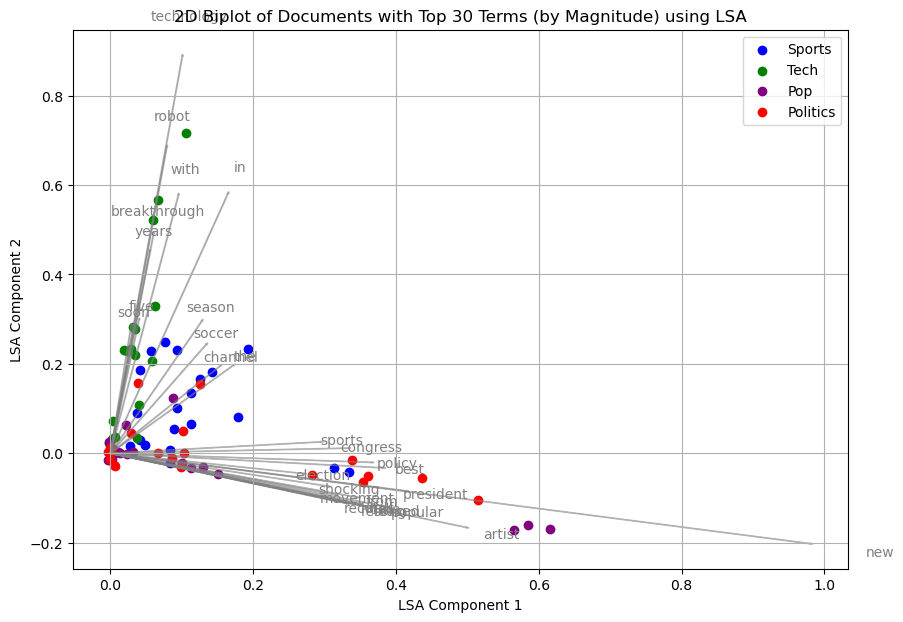

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the expanded corpus
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Apply LSA with 2 components for 2D plotting
lsa_2d = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix_2d = lsa_2d.fit_transform(tfidf_matrix)

num_each = 20

# Assign labels to each document
labels = ['Sports'] * num_each + ['Tech'] * num_each + ['Pop'] * num_each + ['Politics'] * num_each
label_colors = {'Sports': 'blue', 'Tech': 'green', 'Pop': 'purple', 'Politics': 'red'}
colors = [label_colors[label] for label in labels]

# Plot the documents in 2D space with unique labels in the legend
plt.figure(figsize=(10, 7))
unique_labels = set()
for i, label in enumerate(labels):
    if label not in unique_labels:
        plt.scatter(lsa_matrix_2d[i, 0], lsa_matrix_2d[i, 1], color=colors[i], label=label)
        unique_labels.add(label)
    else:
        plt.scatter(lsa_matrix_2d[i, 0], lsa_matrix_2d[i, 1], color=colors[i])

k = 30

# Plot the top k feature contributions as arrows based on vector magnitudes
terms = vectorizer.get_feature_names_out()
magnitudes = np.linalg.norm(lsa_2d.components_.T, axis=1)
top_indices = np.argsort(magnitudes)[-k:]  # Select indices of the k largest magnitudes

for i in top_indices:
    comp = lsa_2d.components_.T[i]
    plt.arrow(0, 0, comp[0] * 2, comp[1] * 2, color='gray', alpha=0.5)
    plt.text(comp[0] * 2.2, comp[1] * 2.2, terms[i], color='gray', ha='center', va='center')

plt.xlabel("LSA Component 1")
plt.ylabel("LSA Component 2")
plt.title(f"2D Biplot of Documents with Top {k} Terms (by Magnitude) using LSA")
plt.legend(loc='best')
plt.grid(True)
plt.show()

E:\Miniconda\envs\mhc\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


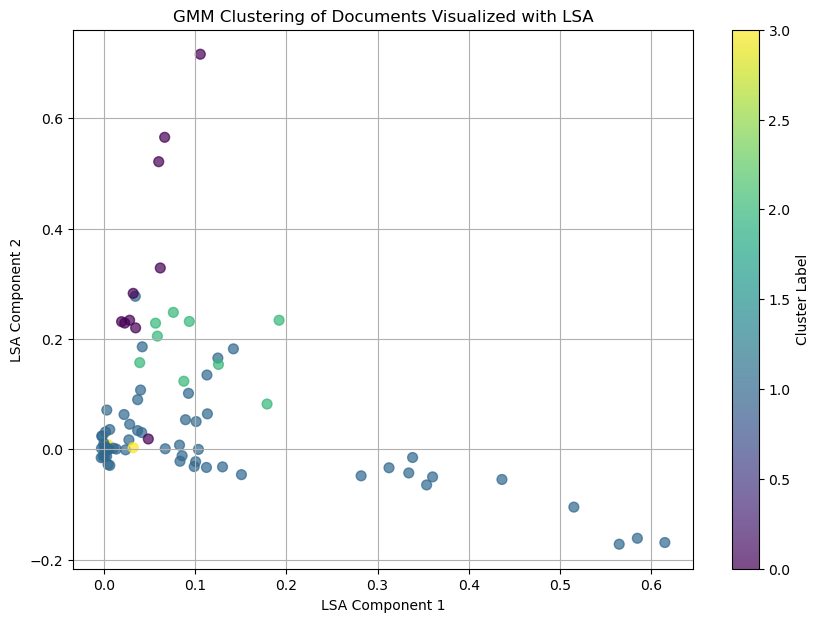

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture

# Vectorize the corpus
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Apply GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(tfidf_matrix.toarray())  # GMM requires dense format, so we convert to array

# Reduce TF-IDF matrix to 2D using Truncated SVD (LSA)
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix_2d = lsa.fit_transform(tfidf_matrix)

# Plot the documents in 2D space with GMM cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(lsa_matrix_2d[:, 0], lsa_matrix_2d[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label="Cluster Label")

plt.xlabel("LSA Component 1")
plt.ylabel("LSA Component 2")
plt.title("GMM Clustering of Documents Visualized with LSA")
plt.grid(True)
plt.show()

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

      Sports       1.00      0.57      0.73         7
        Tech       1.00      1.00      1.00         6
         Pop       0.56      1.00      0.71         5
    Politics       1.00      0.83      0.91         6

    accuracy                           0.83        24
   macro avg       0.89      0.85      0.84        24
weighted avg       0.91      0.83      0.84        24



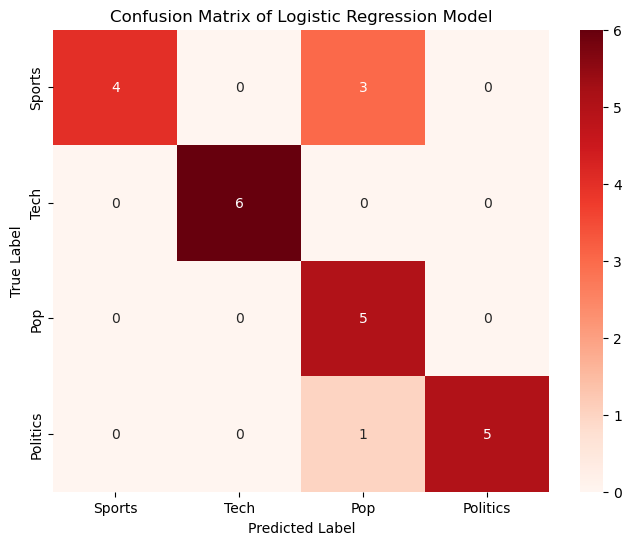

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Sample corpus labels (replace these with real labels if available)
# Assuming labels: 'Sports' = 0, 'Tech' = 1, 'Pop' = 2, 'Politics' = 3
labels = [0] * num_each + [1] * num_each + [2] * num_each + [3] * num_each  # Assign labels for each document

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Sports', 'Tech', 'Pop', 'Politics']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Sports', 'Tech', 'Pop', 'Politics'], yticklabels=['Sports', 'Tech', 'Pop', 'Politics'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

(80, 335)
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

      Sports       0.67      0.86      0.75         7
        Tech       1.00      0.83      0.91         6
         Pop       0.83      1.00      0.91         5
    Politics       1.00      0.67      0.80         6

    accuracy                           0.83        24
   macro avg       0.88      0.84      0.84        24
weighted avg       0.87      0.83      0.84        24



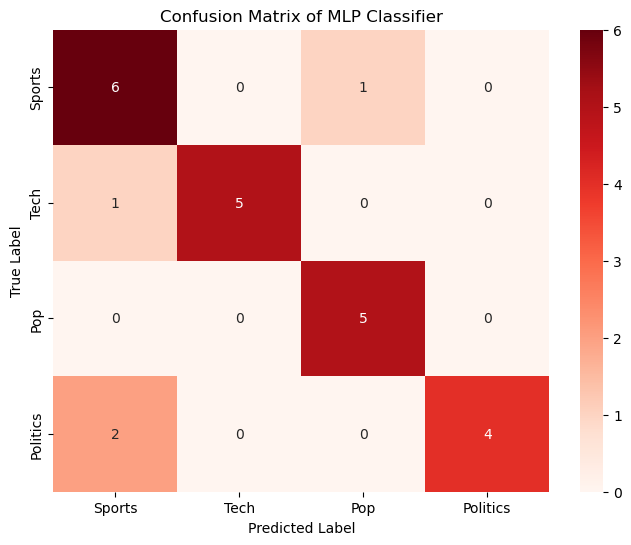

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Sample corpus labels (replace these with real labels if available)
# Assuming labels: 'Sports' = 0, 'Tech' = 1, 'Pop' = 2, 'Politics' = 3
labels = [0] * num_each + [1] * num_each + [2] * num_each + [3] * num_each  # Assign labels for each document

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

print(tfidf_matrix.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

# Train MLP model with specified hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 8), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Sports', 'Tech', 'Pop', 'Politics']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Sports', 'Tech', 'Pop', 'Politics'], yticklabels=['Sports', 'Tech', 'Pop', 'Politics'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of MLP Classifier")
plt.show()

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

      Sports       1.00      0.86      0.92         7
        Tech       1.00      1.00      1.00         6
         Pop       0.83      1.00      0.91         5
    Politics       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.97      0.96      0.96        24



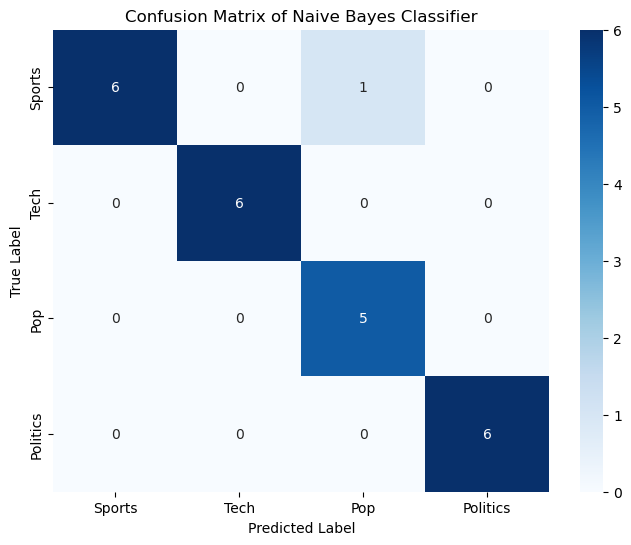

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Sample corpus labels (replace these with real labels if available)
# Assuming labels: 'Sports' = 0, 'Tech' = 1, 'Pop' = 2, 'Politics' = 3
labels = [0] * num_each + [1] * num_each + [2] * num_each + [3] * num_each  # Assign labels for each document

# Vectorize the corpus using Bag of Words (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, labels, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Sports', 'Tech', 'Pop', 'Politics']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Sports', 'Tech', 'Pop', 'Politics'], yticklabels=['Sports', 'Tech', 'Pop', 'Politics'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Naive Bayes Classifier")
plt.show()

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

      Sports       1.00      0.86      0.92         7
        Tech       1.00      0.83      0.91         6
         Pop       0.83      1.00      0.91         5
    Politics       0.86      1.00      0.92         6

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



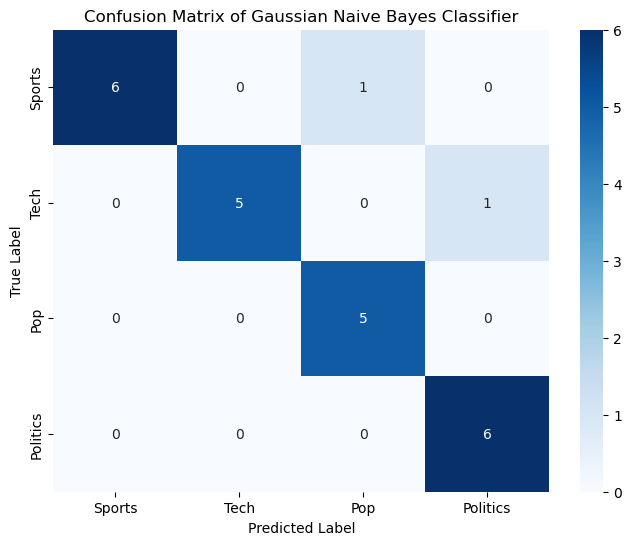

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Sample corpus labels (replace these with real labels if available)
# Assuming labels: 'Sports' = 0, 'Tech' = 1, 'Pop' = 2, 'Politics' = 3
# Replace `num_each` with the number of samples per class
labels = [0] * num_each + [1] * num_each + [2] * num_each + [3] * num_each  # Assign labels for each document

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert sparse matrix to dense for GaussianNB
X_dense = tfidf_matrix.toarray()

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_dense, labels, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Sports', 'Tech', 'Pop', 'Politics']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Sports', 'Tech', 'Pop', 'Politics'], yticklabels=['Sports', 'Tech', 'Pop', 'Politics'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Gaussian Naive Bayes Classifier")
plt.show()